In [1]:
%matplotlib inline

# Departamento de Engenharia de Teleinformática

# Métodos Numéricos

# Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))

---

## Identificação do aluno

Nome:Lucas de Souza Abdalah

Matrícula:385472

---

## Instruções

As questões abaixo devem ser resolvidas aqui mesmo no **Jupyter Notebook** e podem envolver tanto soluções escritas em markdown (veja sintaxe para markdown [aqui](https://daringfireball.net/projects/markdown/basics)), como soluções em código. A questão 0 abaixo serve de exemplo de como as questões devem ser resolvidas.

<div class="alert alert-warning">
**Dica:** em células markdown vocês podem usar dois espaços para criar uma quebra de linha.
</div>

## Questão 0

Para entender como as questões devem ser resolvidas, faça:

1. Em que país estamos?
2. Implemente uma função que retorne o dobro da entrada

## Solução de 0

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estamos no Brasil.

<!-- Não apague o div -->
</div>

In [1]:
# Solução de 2: Implementação em python
def dobro(x):
    return 2 * x

# Testa da solução
print("O dobro de 2 é", dobro(2))

O dobro de 2 é 4


---

## Questão 1 (1 ponto)
A razão áurea pode ser definida como a razão que divide um segmento de tamanho $a + b$ de tal modo que a parte menor $a$ está para a parte maior $b$ na mesma proporção que a parte maior $b$ está para o todo $a + b$. Crie uma função `GoldenSection(f, a, b, tol)` em Python 3.X que implemente uma versão do método da bisseção que divida o intervalo segundo a razão áurea. Implemente também uma função `Bisection(f, a, b, tol)` que implemente o método da bisseção clássico e compare os dois métodos através de um exemplo de aplicação.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">
Para implementar a Seção Áurea se faz necessário uma análise do tamanho de duas seções obtidas dentro do intervalo $[a, b]$ a partir de um ponto $c$ definido como aproximação da primeira solução e partindo do ponto que sabemos qual seção é maior, aplicamos a equação da proporção utilizada no método, e com as atribuições apresentadas, que involvem restringir mais o intervalo nos aproximamos da raiz, com uma tolerância inserida pelo usuário. 

Já na implementação do Método da Bisseção receberemos uma função $f(x)$ não linear com uma ou mais raízes. Limitaremos os intervalo com os parâmetros $a$ e $b$ como extremos do intervalo que contém uma raiz, levando em consideração as condições iniciais pro método convergir. E, finalmente, o parâmetro $tol$ que é a tolerância que calcula o módulo do erro entre a solução exata e a solução númerica, para garantir a precisão requerida
<!-- Não apague o div -->
</div>
 

In [2]:
#Importando as bibliotecas utlilizadas
import matplotlib.pyplot as plt
import numpy as np
import math as m

#Implementacao de funcoes para testar a convergencia do metodo
def p(x):
    return ((-1)*x**2 + 3)
def f(x):
    # x = +2
    return -x**3 + 8
def g(x):
    # x = + ou - (10**0,5)
    return x**2 - 10
def h(x):
    # x =~2.43 Funcao de teste retirada de GILAT, pagina 78
    return 8 - 4.5*(x - np.sin(x))


#Metodo da Secao Aurea
def GoldeSection(f, a, b, tol = 4*1e-9):
    #Definindo tolerancia suportada
    if tol < 4*1e-9:
        tol = 4*1e-9
    
    #iniciando contador
    count = 0
    
    fa, fb = f(a), f(b)
    #Verificacao
    if fa*fb == 0:
        if fa == 0:
            print("Erro, raiz já encontrada é:", a)
            return a
        if fb == 0:
            print("Erro, raiz já encontrada é:", b)
            return b
    #verificacoes para analisar como serao tratado os intervalos das secoes
    if fb > fa:
        c = a
    
    else:
        c = b
    
    fc = f(c)
    
    #laco que implementa a equacao da secao aurea e devolve as raizes dessa
    while abs(f(c)) >= tol:
        
        #Calculo do primeiro delta
        delta1 = (a-3*b)**2 -4*(-(a**2) + b**2 + a*b)
        root1 = (-(a-3*b) + m.sqrt(delta1))/2
        root2 = (-(a-3*b) - m.sqrt(delta1))/2
        
        #A partir de agora, teremos condicoes de verificacao para tratar os extremos do intervalo
        if (b > root1 and root1 > a):
            c_aux1 = root1
        else:
            c_aux1 = root2
            
        #Calculo do segundo delta
        delta2 = (b-3*a)**2 -4*(-(b**2) + a**2 + a*b)
        root3 = (-(b-3*a) + m.sqrt(delta2))/2
        root4 = (-(b-3*a) - m.sqrt(delta2))/2
        
        #Novamente bloco de verificacoes utilizando as raizes 
        if (b > root3 and root4 > a):
            c_aux2 = root3
        else:
            c_aux2 = root4  
        
        #Utilizando segundo grupo de raízes obtido para verificar condicao do dominio
        if abs(f(c_aux1)) > abs(f(c_aux2)):
            c = c_aux2
        else:
            c = c_aux1 
        #Apos mover o ponto sobre o gráfico por count + 1 iteracoes, teremos o retorno de c, a raiz da funcao
        if f(c)*fb > 0:
            b = c
        else:
            a = c
        
        count += 1
    #print(count) 
    
    return count, c


print("Metodo da Secao Aurea aplicado em p(x)\n (itereacoes, solucao):", GoldeSection(p,1.6,1.9,1e-16), "\n\n",
      "Metodo da Secao Aurea aplicado em f(x)\n (itereacoes, solucao):", GoldeSection(f,1.7,2.2,1e-6), "\n\n",
      "Metodo da Secao Aurea aplicado em g(x)\n (itereacoes, solucao):", GoldeSection(g,3,3.5,1e-6), "\n\n")

#Metodo Recursivo da Bissecao com tol default de ordem (1e-3)
def Bisection(f, a, b, tol=1e-3):
    x = (a+b)/2
    fa, fb, fx = f(a), f(b), f(x)
    #Verificacao do sinal do primeiro intervalo de estimativa
    
    if fa*fb >= 0:
        print("Erro!")

        if fa == 0:
            print("\traiz já encontrada é:", a)
            return a
        if fb == 0:
            print("\traiz já encontrada é:", b)
            return b
    
    #Observa a tolerancia
    if abs(fx) <= tol:
        return x
    #Verfica 
    if fa*fx < 0:
        return Bisection(f, a, x, tol)
    else:
        if fb*fx < 0:
            return Bisection(f, x, b, tol)

print("Metodo da Bissecao aplicado em f(x):", Bisection(f,2,3), "\n\n"
      "Metodo da Bissecao aplicado em g(x):", Bisection(g,1,4), "\n\n"
      "Metodo da Bissecao aplicado em h(x):", Bisection(h,1,4))


#Gerando o intervalo que possibilita ver a/uma raiz
x0 , x1, x2, x3 = np.linspace(1,3), np.linspace(1,3), np.linspace(2,4), np.linspace(1,4)

#Plot das funções p(x), f(x), g(x), h(x)
#Plot de p(x)
plt.figure(1)
plt.plot(x0, p(x0), 'orange')
plt.xlabel('x label')
plt.ylabel('p(x) label')
plt.title('Plot da p(x)')
plt.grid('on')


#Plot de f(x)
plt.figure(2)
plt.plot(x1, f(x1), 'b-')
plt.xlabel('x label')
plt.ylabel('f(x) label')
plt.title('Plot da f(x)')
plt.grid('on')

#Plot de g(x)
plt.figure(3)
plt.plot(x2,g(x2),'r-')
plt.xlabel('x label')
plt.ylabel('g(x) label')
plt.title('Plot da g(x)')
plt.grid('on')

#Plot de h(x)
plt.figure(4)
plt.plot(x3, h(x3),'g-')
plt.xlabel('x label')
plt.ylabel('h(x) label')
plt.title('Plot da h(x)')
plt.grid('on')

#Geracao do Intervalo pra analise de comportamento das funções
x4 = np.linspace(1,4)

#Plot de f,g e h em (x)
plt.figure(5)
plt.plot(x4, p(x4), 'orange')
plt.plot(x4, f(x4), 'b-')
plt.plot(x4, g(x4),'r-')
plt.plot(x4, h(x4),'g-')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Plot das Funcoes')
plt.grid('on')

Metodo da Secao Aurea aplicado em p(x)
 (itereacoes, solucao): (25, 1.7320508070168363) 

 Metodo da Secao Aurea aplicado em f(x)
 (itereacoes, solucao): (23, 1.999999995982886) 

 Metodo da Secao Aurea aplicado em g(x)
 (itereacoes, solucao): (22, 3.162277721403601) 


Erro!
	raiz já encontrada é: 2
Metodo da Bissecao aplicado em f(x): 2 

Metodo da Bissecao aplicado em g(x): 3.16229248046875 

Metodo da Bissecao aplicado em h(x): 2.430419921875


# Questão 2 (1 ponto)
Em vez de usar dois valores arbitrários para fazer uma estimativa da derivada, uma abordagem alternativa envolve utilizar uma pequena perturbação $\delta x$ da variável independente $x$ para fazer
$$f'(x_i) \approxeq \dfrac{f(x_i + \delta x_i) - f(x_i)}{\delta x_i} $$
onde $\delta$ é uma pequena fração de perturbação. Utilizando essa formulação, implemente uma função ` ModifiedSecant(f, x, delta, tol)` em Python 3.X para o método da secante.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Primeiramente, geramamos um $delta$ aleatório e parametrizamos de tal forma que o método convirja. Após aplicamos o método da secante com essa alteração e podemos ver a convergência do mesmo

<!-- Não apague o div -->
</div>

In [3]:
#Importando as bibliotecas utlilizadas
import matplotlib.pyplot as plt
import numpy as np
import math as m

#Implementacao de funcoes para testar a convergencia do metodo
def f(x):
    # x = +2
    return -x**3 + 8
def g(x):
    # x = + ou - (10**0,5)
    return x**2 - 10
def h(x):
    # x =~2.43 Funcao de teste retirada de GILAT, pagina 78
    return 8 - 4.5*(x - np.sin(x))

#Utilizando um delta aleatorio de ordem entre [1e-5, 1e-3]
delta_ = (np.random.rand())/1e3
print("Delta =", delta_)


def ModifiedSecant(f, x, delta, tol=1e-3):
    #Criando uma funcao que calcula a derivada numericamente
    def derivada(f, x, delta):
        return (f(x+delta*x) - f(x))/(delta*x)
    #Calcula a solucao pelo metodo da secante
    while(np.abs(f(x)) >= tol):
        x = x - (f(x))/derivada(f,x,delta)
    #retorna a solucao e derivada
    return x, derivada(f,x,x)

#O metódo retorna a derivada e solucao com bastante precisao
print("\nMetodo da Secante Modificado aplicado em f(x)\n(Solucao, Derivada) =", ModifiedSecant(f,1.9,delta_), "\n\n"
      "Metodo da Secante Modificado aplicado em g(x)\n(Solucao, Derivada) =", ModifiedSecant(g,1.9,delta_), "\n\n"
      "Metodo da Secante Modificado aplicado em h(x)\n(Solucao, Derivada) =", ModifiedSecant(h,1.9,delta_), "\n")

Delta = 0.00042643221501480124

Metodo da Secante Modificado aplicado em f(x)
(Solucao, Derivada) = (2.0000163093389736, -52.00130475908769) 

Metodo da Secante Modificado aplicado em g(x)
(Solucao, Derivada) = (3.1623777404993607, 16.325388454604564) 

Metodo da Secante Modificado aplicado em h(x)
(Solucao, Derivada) = (2.430466394893828, -4.322796816661186) 



## Questão 3 (1 ponto)
A fim de atenuar a natureza frequentemente unilateral do método da falsa posição, implemente uma **função** em `ModifiedRegulaFalsi(f, a, b, tol)` em Python 3.X que divida por dois o valor de $f(x)$ no limite do intervalo que permanecer inalterado por três iterações consecutivas, substituindo assim a secante do método original por uma reta de menor inclinação (veja o exercício 3.18 do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*). Crie também uma função `RegulaFalsi(f, a, b, tol)` que implemente o método original. Compare os métodos através de um exemplo de aplicação.

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

O método da Regula Falsi Modificado usa o fato de apenas um dos extremos modificar a cada iteração. Caso isso ocorra, a inclinação da reta utilizada para iterar é reduzida a metade, o que torna a convergência muito mais rápida que o Método da Regula Falsi Comum. O Comum pode fixar um dos extremos do intervalo e variar apenas o outro, demorando um pouco pra convergir ou precisando de uma estimativa inicial mais próxima da solução 

<!-- Não apague o div -->
</div>

In [4]:
#Importando as bibliotecas utlilizadas
import matplotlib.pyplot as plt
import numpy as np

# Metodo da Regula Falsi Modificado
def ModifiedRegulaFalsi(f, a, b, tol=1e-3):
    #Facilitando notacao
    fa, fb = f(a), f(b)
    
    #Bloco de verificações do intervalo e da solucao
    if abs(b-a) < tol:
        return ("Intervalo inadequado")
    if abs(f(a)) <= tol:
        return (a)
    if abs(fb) <= tol:
        return (b)

    #Iniciando contador de iteracoes e da aproximacao do intervalo pelos extremos
    k, VE, VD = 0, 0, 0
    
    #Definindo funcao que obtemos a primeira estimativa de solucao 
    def xp(f, a, b):
        return ((a*f(b) - b*f(a))/(f(b) - f(a)))

    x = xp(f, a, b)

    while abs(f(x)) > tol:
        #primeira estimativa        
        if fa*f(x) < 0:
            b = x
            VD += 1
            if VD == 3:
                fb = 0.5*fb
                VE, VD = 0, 0
        
        if fa*f(x) > 0: 
            a = x
            VE += 1
            if VE == 3:
                fa = 0.5*fa
                VE, VD = 0, 0
        x = xp(f, a, b)
    
    return (x)

print("Metodo da RegulaFalsi Modificada em f(x):", ModifiedRegulaFalsi(f, 1.9, 2.1), "\n"
      "Metodo da RegulaFalsi Modificada em g(x):", ModifiedRegulaFalsi(g, 2, 3.6), "\n"
      "Metodo da RegulaFalsi Modificada em h(x):", ModifiedRegulaFalsi(h, 2, 2.55), "\n")


# Metodo da Regula Falsi Recursivo
def RegulaFalsi(f, a, b, tol = 1e-3):
    #Facilitando notacao
    fa, fb = f(a), f(b)  
    #Definindo primeira estimativa de solucao
    x = (a*fb - b*fa)/(fb - fa)
    fx = f(x)

    #Verificacao do sinal do primeiro intervalo de estimativa
    if fa*fb >= 0:
        print("Erro!")
        
        if fa == 0:
            print("\traiz já encontrada é:", a)
            return a
        
        if fb == 0:
            print("\traiz já encontrada é:", b)
            return b
        
    else:
        
        if abs(fx) <= tol:
            return x
        
        if fa*fx < 0:
            return RegulaFalsi(f, a, x, tol)
        
        if fa*fx > 0: 
            return RegulaFalsi(f, x, b, tol)
        

print("Metodo da RegulaFalsi em f(x):", RegulaFalsi(f,1.9999,2.0000001), "\n"
      "Metodo da RegulaFalsi em g(x):", RegulaFalsi(g,1,4), "\n"
      "Metodo da RegulaFalsi em h(x):", RegulaFalsi(h,1,4))

Metodo da RegulaFalsi Modificada em f(x): 1.9999882897679728 
Metodo da RegulaFalsi Modificada em g(x): 3.1622526613396125 
Metodo da RegulaFalsi Modificada em h(x): 2.4304608482483134 

Metodo da RegulaFalsi em f(x): 1.9999999999949998 
Metodo da RegulaFalsi em g(x): 3.1622057400838437 
Metodo da RegulaFalsi em h(x): 2.4304456770707397


## Questão 4 (3 pontos)
Em comunicações móveis, a qualidade de um enlace de comunicação pode ser medida pela sua razão sinal interferência-mais-ruído (SINR, do inglês _Signal to Interference-plus-Noise Ratio_) que é a razão entre a potência do sinal de interesse e a soma das potências dos sinais interferentes e do ruído presentes em um mesmo canal. Quando a potência do ruído é desprezível, a SINR reduz-se à razão sinal-interferência (SIR, do inglês _Signal to Interference Ratio_).

Considere o cenário de comunicações em que duas células circulares $A$ e $B$ de raio $R = 0.5$ km cada. No centro de cada célula, há uma estação rádio-base (BS, do inglês _Base Station_) que serve um terminal móvel (MS, do inglês _Mobile Station_) posicionado aleatoriamente dentro de sua área de cobertura segundo uma distribuição uniforme de probabilidade. O cenário em questão é ilustrado pelo código a seguir onde as posições das BSs são indicadas pelos marcadores $\bullet$ e as dos MSs pelos marcadores em $\times$.

(-1.0, 1.0)

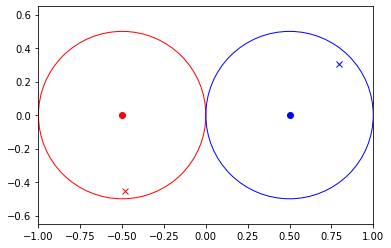

In [5]:
# Importa a biblioteca numpy para vetores e matrizes
import numpy as np
# Importa a biblioteca pyplot para plotagem
import matplotlib.pyplot as plt

# Raio da célula em quilometros
radius = 0.5
bsPosA = -radius + 1j*0 # Posição da base A
bsPosB = +radius + 1j*0 # Posição da base B
# Gera aleatoriamente a posição do móvel A em um círculo centrado na base A
while True:
    msPosA = (np.random.rand(1,1) + 1j*np.random.rand(1,1))-(0.5 + 1j*0.5)
    msPosA = 2*radius*msPosA
    if(np.abs(msPosA) <= radius):
        break
msPosA = msPosA + bsPosA
# Gera aleatoriamente a posição do móvel B em um círculo centrado na base B
while True:
    msPosB = (np.random.rand(1,1) + 1j*np.random.rand(1,1))-(0.5 + 1j*0.5)
    msPosB = 2*radius*msPosB
    if(np.abs(msPosB) <= radius):
        break
msPosB = msPosB + bsPosB

# Desenha círculos para as áreas de coberturas das células
cA = plt.Circle((np.real(bsPosA), np.imag(bsPosA)), radius, color='r', fill=False)
cB = plt.Circle((np.real(bsPosB), np.imag(bsPosB)), radius, color='b', fill=False)
plt.gca().add_artist(cA)
plt.gca().add_artist(cB)
# Plota a posição das bases e dos móveis
plt.plot(np.real(bsPosA), np.imag(bsPosA), 'ro') # Posição da base A
plt.plot(np.real(bsPosB), np.imag(bsPosB), 'bo') # Posição da base B
plt.plot(np.real(msPosA), np.imag(msPosA), 'rx') # Posição do móvel A
plt.plot(np.real(msPosB), np.imag(msPosB), 'bx') # Posição do móvel B
plt.axis([-2*radius, 2*radius, -radius, radius])
plt.axis('equal')
plt.xlim((-2*radius,2*radius))
plt.ylim((-2*radius,2*radius))

Como só há um MS associado a cada base, usamos $A$ e $B$ para indicar tanto as BSs quanto os MSs. Assim, a SINR $\gamma_A$ do MS $A$ na BS $A$ é dada por
$$
\gamma_A = \frac{g_{A,A}p_A}{g_{B,A}p_B + \sigma^2},
$$
em que $g_{i,j}$ é o ganho do canal de comunicação da BS $i$ para o MS $j$, $p_{i}$ é a potência de transmissão da BS $i$, e $\sigma^2$ é a potência do ruído. Analogamente,
$$
\gamma_B = \frac{g_{B,B}p_B}{g_{A,B}p_A + \sigma^2}.
$$
Considere que a qualidade alvo para os ambos enlaces de comunicação entre a BS $i$ e seu MS $i$ é $\gamma_t$, de modo que ambos os enlaces têm qualidade balanceada.

É possível mostrar que, quando a potência do ruído $\sigma^2$ é desprezível, a máxima SIR balanceada $\gamma_{max}$ (igual para os dois enlaces) é dada por
$$
\gamma_{max} = \frac{1}{\lambda_{max}-1},
$$
em que $\lambda_{max}$ é o maior autovalor da matriz $\mathbf{Z} = \left[\begin{array}{cc} \frac{g_{A,A}}{g_{A,A}} & \frac{g_{B,A}}{g_{A,A}} \\ \frac{g_{A,B}}{g_{B,B}} & \frac{g_{B,B}}{g_{B,B}} \end{array}\right]$. As potências ótimas para o balanceamento de SIR são as potências do autovetor dominante associado a $\lambda_{max}$.

O código abaixo calcula a máxima SIR balanceada e as potências de transmissão a serem usadas pelas BSs.

In [6]:
# Importa a biblioteca numpy para vetores e matrizes
import numpy as np
# Importa a biblioteca pyplot para plotagem
import matplotlib.pyplot as plt

# Calcula a perda de percurso entre a base i = {A, B} e o móvel j = {A, B}
gAA = float(np.abs(msPosA - bsPosA)**(-2)) # Perda de percurso entre a base A e o móvel A
gBA = float(np.abs(msPosA - bsPosB)**(-2)) # Perda de percurso entre a base B e o móvel A
gBB = float(np.abs(msPosB - bsPosB)**(-2)) # Perda de percurso entre a base B e o móvel B
gAB = float(np.abs(msPosB - bsPosA)**(-2)) # Perda de percurso entre a base B e o móvel B
# Monta a matriz de ganho
G = np.array([[gAA, gBA],[gAB, gBB]])
# Monta a matriz de ganho normalizado
Z = np.array([[gAA/gAA, gBA/gAA], [gAB/gBB, gBB/gBB]])
# Calcula os autovalores e autovetores de Z
[E, V] = np.linalg.eig(Z)
# Calcula a máxima SIR atingível
maxSIR = 1/(E[0]-1)
print("Máxima SIR atingível: ", maxSIR)
# Potências ótimas para balanceamento de SIR
pAOpt, pBOpt = V.T[0][0], V.T[0][1]
print("pAOpt: ", pAOpt, ", pBOpt:", pBOpt, " para balanceamento de SIR")
# Potência do ruído
sigmaPwr = 0.01

# Calcula a SIR ótima balanceada
sirAOpt = (gAA*pAOpt)/(gBA*pBOpt)
sirBOpt = (gBB*pBOpt)/(gAB*pAOpt)
print("SIR Opt. A: ", sirAOpt, ", SIR Opt. B: ", sirBOpt)

# Calcula a SINR subótima balanceada
sinrASubopt = (gAA*pAOpt)/(gBA*pBOpt + sigmaPwr)
sinrBSubopt = (gBB*pBOpt)/(gAB*pAOpt + sigmaPwr)
print("SINR Subopt. A: ", sinrASubopt, ", SINR Subopt. B: ", sinrBSubopt)
plt.show()

Máxima SIR atingível:  7.533987217876016
pAOpt:  0.7961979391943994 , pBOpt: 0.6050362316610399  para balanceamento de SIR
SIR Opt. A:  7.533987217876011 , SIR Opt. B:  7.533987217876013
SINR Subopt. A:  7.391457471632418 , SINR Subopt. B:  7.370568405173534


Considerando a modelagem apresentada acima, deseja-se encontrar uma alocação de potência $p_A$ e $p_B$ de modo que a SIR $\gamma_t$ dos dois enlaces seja a mesma (SIR balanceada) e que seu valor seja igual a 80% da máxima SIR balanceada $\gamma_{max}$, ou seja, $\gamma_t = 0.8\gamma_{max}$. 
* Utilizando as informações do modelo acima, formule um sistema de duas equações ($f_1(p_A, p_B)$ e $f_2(p_A, p_B$) e duas incógnitas ($p_A$ e $p_B$) e solucione o problema de balanceamento de SIR proposto utilizando o método de Newton. Considere uma precisão de $10^{-2}$ para a convergência dos valores de SIR dos enlaces e limite adequadamente o número de iterações do processo.
* É possível manter a proporção entre $p_A$ e $p_B$ e alterar seus valores mantendo o balanceamento de SIR? Qual o efeito desse tipo de abordagem sobre a SINR dos enlaces?

## Solução:

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estimamos um valor inicial de $P_A$ e $P_b$ de ordem igual ou maior que a potência da ruído e fazemos várias iterações até chegar do Método de Newton para solução de sistemas não lineares até obtermos o valor dentro da faixa esperada. Sobre $P_A$ e $P_B$ manterem uma proporção. Após diversos testes com uma coleção de dados considerável, não pude notar uma tendência, proporcionalidade envolvendo tais fatores.

<!-- Não apague o div -->
</div>

#### Parte1
$$\ f_1(P_A,P_B) = \frac{g_{A,A}P_A}{g_{B,A}P_B + \sigma^2} - \gamma_A,$$

$$ \frac{\partial f_1(P_A,P_B)}{\partial P_A} = \frac{g_{A,A}}{g_{B,A}P_B + \sigma^2},$$

$$ \frac{\partial f_1(P_A,P_B)}{\partial P_A} = \frac{g_{A,A}P_A(-g_{B,A})}{(g_{B,A}P_B + \sigma^2)^2}.$$

#### Parte 2
$$\ f_2(P_A,P_B) = \frac{g_{B,B}P_B}{g_{B,A}P_A + \sigma^2} - \gamma_B,$$

$$ \frac{\partial f_2(P_A,P_B)}{\partial P_A} = \frac{g_{B,B}P_B(-g_{A,B})}{(g_{A,B}P_A + \sigma^2)^2}.$$

$$ \frac{\partial f_2(P_A,P_B)}{\partial P_B} = \frac{g_{B,B}}{g_{B,A}P_A + \sigma^2},$$


* Por consequência: 
$$\ f_1(P_{A{_2}},P_{B{_2}}) = f_1(P_{A{_1}},P_{B{_1}}) + \Delta P_A \frac{\partial f_1(P_A,P_B)}{\partial P_A} + \Delta P_B \frac{\partial f_1(P_A,P_B)}{\partial P_B} + \epsilon $$

* Por consequência:
$$\ f_2(P_{A{_2}},P_{B{_2}}) = f_2(P_{A{_1}},P_{B{_1}}) + \Delta P_A \frac{\partial f_2(P_A,P_B)}{\partial P_A} + \Delta P_B \frac{\partial f_2(P_A,P_B)}{\partial P_B} + \epsilon $$

Concluimos que:

$ \gamma_A $ é relacionado por: $\ f_1(P_{A{_2}},P_{B{_2}}) = f_1(P_{A{_1}},P_{B{_1}}) + \Delta P_A \frac{g_{A,A}}{g_{B,A}P_{B{_1}} + \sigma^2} + \Delta P_B \frac{g_{A,A}P_{A{_1}}(-g_{B,A})}{(g_{B,A}P_{B{_1}} + \sigma^2)^2} + \epsilon $

$ \gamma_B $ é relacionado por: $\ f_2(P_{A{_2}},P_{B{_2}}) = f_2(P_{A{_1}},P_{B{_1}}) + \Delta P_A \frac{g_{B,B}P_{B{_1}}(-g_{A,B})}{(g_{A,B}P_{A{_1}} + \sigma^2)^2} + \Delta P_B \frac{g_{B,B}}{g_{B,A}P_{A{_1}} + \sigma^2} + \epsilon $

Para solucionar teremos que calcular a matriz de deltas a cada iteração:

$$\left[\begin{array}{cc} \frac{\partial f_1(P_A,P_B)}{\partial P_A} & \frac{\partial f_1(P_A,P_B)}{\partial P_B} \\ \frac{\partial f_2(P_A,P_B)}{\partial P_A} & \frac{\partial f_2(P_A,P_B)}{\partial P_B} \end{array}\right] * \left[\begin{array}{cc} \Delta P_A \\ \Delta P_B \end{array}\right] =  \left[\begin{array}{cc} -f_1(P_A,P_B) \\ -f_2(P_A,P_B) \end{array}\right]$$

In [7]:
# Importa a biblioteca numpy para vetores e matrizes
import numpy as np
# Importa a biblioteca pyplot para plotagem
import matplotlib.pyplot as plt

def NewtonSINR(maxSIR, sigmaPwr, gAA, gAB, gBA, gBB, Pa, Pb, tol = 1e-2):
    
    def F1(Pa,Pb):
        return (gAA)*Pa/(gBA*Pb + sigmaPwr)
    def F2(Pa,Pb):
        return (gBB)*Pb/(gAB*Pa + sigmaPwr)
    
    if abs((F1(Pa,Pb) - 0.8*maxSIR)) <= tol:
        if abs((F2(Pa,Pb) - 0.8*maxSIR)) <= tol:
            print("Pa =", Pa, "Pb =", Pb, " =", maxSIR)
            
    
    if abs((F1(Pa,Pb) - 0.8*maxSIR)) <= tol:
        print("Pa já convergiu") 
    if abs((F2(Pa,Pb) - 0.8*maxSIR)) <= tol:
        print("Pb já convergiu")
    
    
        
    else:
        #define as funcoes Ya e Yb (Y representando gama) em função do Ymax(maxSIR)
        Ya, Yb = 0.8*maxSIR, 0.8*maxSIR
        
        #Inicializando os deltas
        delta1, delta2 = 0, 0

        #derivadas parcias de f1 e f2 em dx e dy
        df1dx, df1dy = (gAA)/(gBA*Pb + sigmaPwr), (gAA*(-1*gBA)*Pa)/((gBA*Pb) + sigmaPwr)**2
        df2dx, df2dy = (gBB*(-1*gAB)*Pb)/((gAB*Pa) + sigmaPwr)**2, (gBB)/((gAB*Pa) + sigmaPwr)
        #define as funcoes f1 e f2 utilizadas
        f1, f2 = F1(Pa,Pb) - Ya, F2(Pa,Pb) - Yb
    
        #Monta a matriz das derivadas parciais
        M_DP = np.array([[df1dx, df1dy],[df2dx, df2dy]])
        M_F = np.array([[-f1],[-f2]])
        M_DELTA = np.array([[delta1], [delta2]])
        
        #Calcula o determinante de M_DP
        detM_DP = np.linalg.det(M_DP)
    
        #Conferindo as matrizes
        print("Matriz das DPs:\n", M_DP, "\n\nMatriz com resultado das fuções:\n", M_F, "\n\nMatriz com deltas:\n", 
              M_DELTA, "\n\nDeterminante da DP:\n", detM_DP, "\n\nInversa da DP:\n\n\n")
    
        #Condicao de existência para o cálculo da matriz inversa
        if detM_DP != 0:
            #if M_DP[0][0]  <= tol & M_DP[0][1] <= tol & M_DP[1][0] <= tol & M_DP[1][1] <= tol:
            #return NewtonSINR(maxSIR, sigmaPwr, gAA, gAB, gBA, gBB, PaNovo, PbNovo)
            
            #Calcula a inversa de DP
            invM_DP = np.linalg.inv(M_DP)
            
            #Faz o produto da inversa e obtem um matriz com os resultados de delta
            M_DELTA = (np.dot(invM_DP,M_F))
            print("M_DELTA:\n", M_DELTA)
            
            #Atribui a variaveis cada elemento da matriz dos Deltas
            PaNovo = Pa + M_DELTA[0][0]
            PbNovo = Pb + M_DELTA[1][0]
            
            return NewtonSINR(maxSIR, sigmaPwr, gAA, gAB, gBA, gBB, PaNovo, PbNovo)
        else:
            print ("Determinante = 0")

NewtonSINR(maxSIR, sigmaPwr, gAA, gAB, gBA, gBB, 1e-2, 1e-2, tol = 1e-2)

Matriz das DPs:
 [[ 264.23340044 -121.9523617 ]
 [-129.65087291  358.52545483]] 

Matriz com resultado das fuções:
 [[3.38485577]
 [2.44193523]] 

Matriz com deltas:
 [[0]
 [0]] 

Determinante da DP:
 78923.16992510742 

Inversa da DP:



M_DELTA:
 [[0.01914972]
 [0.01373602]]
Matriz das DPs:
 [[ 161.71327431 -133.14980612]
 [-107.43048665  211.83225122]] 

Matriz com resultado das fuções:
 [[1.31329287]
 [0.99913492]] 

Matriz com deltas:
 [[0]
 [0]] 

Determinante da DP:
 19951.73847990712 

Inversa da DP:



M_DELTA:
 [[0.02061136]
 [0.01516966]]
Matriz das DPs:
 [[ 113.20608966 -111.38947349]
 [ -84.87396136  147.06624404]] 

Matriz com resultado das fuções:
 [[0.39393266]
 [0.30547747]] 

Matriz com deltas:
 [[0]
 [0]] 

Determinante da DP:
 7194.728540520535 

Inversa da DP:



M_DELTA:
 [[0.01278174]
 [0.00945366]]
Matriz das DPs:
 [[ 95.37702928 -99.37561726]
 [-74.5486654  123.62662517]] 

Matriz com resultado das fuções:
 [[0.06204127]
 [0.04868742]] 

Matriz com deltas:
 [[0